In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data was obtained from https://www.kaggle.com/datasets/promptcloud/walmart-product-review-dataset/data which contains data on products sold in Walmart

In [19]:
original_data = pd.read_csv('models/marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv', sep = '\t')
data = original_data.copy()
data.shape

(5000, 32)

# Data Preprocessing and Cleaning

In [20]:
data.isnull().sum()

Uniq Id                               0
Crawl Timestamp                       0
Dataset Origin                     5000
Product Id                            0
Product Barcode                    5000
Product Company Type Source           0
Product Brand Source               4861
Product Brand Normalised Source    4861
Product Name Source                4861
Match Rank                         5000
Match Score                        5000
Match Type                         5000
Retailer                              0
Product Category                     10
Product Brand                        13
Product Name                          0
Product Price                        42
Sku                                5000
Upc                                5000
Product Url                           0
Market                                0
Product Description                1127
Product Currency                      0
Product Available Inventory           0
Product Image Url                     0


In [21]:
def drop_column_na(data):
    threshold = len(data) * 1/4
    # Drop columns with more than 'threshold' NaN values
    data.dropna(axis=1, thresh=threshold, inplace=True)
    return data


In [36]:
some_data = pd.read_csv('models/top_9_highest_rated_items.csv', sep = ',')
some_data['Product Name'].values

array(['ACT Braces Care Anticavity Mouthwash (18 Oz, Clean Mint)',
       'Versace Man Eau Fraiche Eau De Toilette Spray, Cologne for Men, 1 Oz',
       'Tree Hut Shea Sugar Scrub Passion Fruit & Guava, 18oz, Ultra Hydrating and Exfoliating Scrub for Nourishing Essential Body Care',
       'Biolage Hydrasource Conditioning Balm For Dry Hair by Matrix for Unisex - 16.9 oz Balm',
       'Ardell Double Up False Eyelashes, 203',
       'Hello Kids Fluoride Free and SLS Free Rinse, Natural Watermelon, 16oz',
       'ReNew Life CleanseMore, Veggie Caps, 60 ea',
       'Clay-Park Labs Ammonium Lactate Lotion 12% 14 oz - (Pack of 3)',
       '(2 Pack) Pro Styl Vitamin &quotE&quot Oil, 6 Oz'], dtype=object)

In [5]:
drop_column_na(data)
data.drop('Product Available Inventory', axis = 1, inplace = True)
data.isnull().sum()

Uniq Id                           0
Crawl Timestamp                   0
Product Id                        0
Product Company Type Source       0
Retailer                          0
Product Category                 10
Product Brand                    13
Product Name                      0
Product Price                    42
Product Url                       0
Market                            0
Product Description            1127
Product Currency                  0
Product Image Url                 0
Product Tags                      0
Product Rating                 2806
Product Reviews Count          1654
Joining Key                       0
dtype: int64

In [6]:
data.rename(columns= {'Uniq Id': "Unique ID"}, inplace = True)
data

,Unique ID,Crawl Timestamp,Product Id,Product Company Type Source,Retailer,Product Category,Product Brand,Product Name,Product Price,Product Url,Market,Product Description,Product Currency,Product Image Url,Product Tags,Product Rating,Product Reviews Count,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,2e17bf4acecdece67fc00f07ad62c910,Competitor,walmart.com,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",8.95,https://www.walmart.com/ip/OPI-Infinite-Shine-...,US,NaN,USD,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,076e5854a62dd283c253d6bae415af1f,Competitor,walmart.com,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",29.86,https://www.walmart.com/ip/Nice-n-Easy-Permane...,US,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,USD,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,8a4fe5d9c7a6ed26cc44d785a454b124,Competitor,walmart.com,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,7.99,https://www.walmart.com/ip/Clairol-Nice-N-Easy...,US,This Clairol Nice N Easy Permanent Color gives...,USD,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,Clairol Nice 'N Easy Permanent Color 7/106A Na...,4.5,29221.0,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,03b5fb878a33eadff8b033419eab9669,Competitor,walmart.com,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",5.16,https://www.walmart.com/ip/Kokie-Professional-...,US,Calling all matte lip lovers! Indulge in our r...,USD,https://i5.walmartimages.com/asr/25b4b467-bc61...,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,ce3d761e57d6ccad80619297b5b1bcbc,Competitor,walmart.com,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",19.97,https://www.walmart.com/ip/Gillette-TRAC-II-Pl...,US,"In 1971, Gillette introduced the Trac II razor...",USD,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,131.0,41c870871328e97da6fb036bb7d4b2da
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2771f0606e9638de508741f52029d51c,2020-07-21 19:00:03 +0000,ad208aa8da338e84dfcf13efd49e8a75,Competitor,walmart.com,Household Essentials > Air Fresheners > Spray ...,Eclectic Lady,"Garden Mint Room Spray (Double Strength), 4 ou...",14.99,https://www.walmart.com/ip/Garden-Mint-Room-Sp...,US,"Garden Mint is a lovely blend of spearmint, le...",USD,https://i5.walmartimages.com/asr/0e0416ae-6b70...,"Garden Mint Room Spray (Double Strength), 4 ou...",4.5,2.0,30ffe1476e6289c474ab1c08e503be4b
4996,0f218eb3ac736975ccfdde987baa4b83,2020-07-01 05:45:18 +0000,1be8241fd6249f7ee007b06afd7ff45d,Competitor,walmart.com,Beauty > Hair Care > Hair Color > Permanent Ha...,Garnier,Garnier Nutrisse Nourishing Hair Color Creme (...,4.44,https://www.walmart.com/ip/Garnier-Nutrisse-No...,US,Garnier Nutrisse Nourishing Hair Color Creme B...,USD,https://i5.walmartimages.com/asr/24d7a837-51f8...,Garnier Nutrisse Nourishing Hair Color Creme (...,3.9,7484.0,dad7562b7fb37c2f2eaf07644f0a8702
4997,34d1aa70845416c3df059a088aaf18dc,2020-12-01T02:02:32+00:00,96ed378fb9466b11abde8f9baea58844,Competitor,walmart.com,Beauty > Makeup > Nails,Stoneway,"Nail File Electric Drill, 6 in 1 Professional ...",15.78,https://www.walmart.com/ip/Nail-File-Electric-...,US,Multifunctional : Our nail drill kit come with...,USD,https://

In [7]:
print(data['Product Currency'].value_counts())
print(data['Retailer'].value_counts())
#We can drop both currency and retailer because all the products are sold in USD at Walmart

Product Currency
USD    5000
Name: count, dtype: int64
Retailer
walmart.com    5000
Name: count, dtype: int64


In [8]:
data.drop(['Product Currency', 'Retailer'], axis = 1, inplace = True)
data.drop(['Joining Key', 'Product Url','Market', 'Crawl Timestamp'], axis = 1, inplace = True)
#We are also dropping Joining Key, Product Url and Market because they are not useful for our analysis

In [9]:
data['Product Company Type Source'].value_counts()
data.drop('Product Company Type Source', axis = 1, inplace = True)

# Cleaning Product ID and Unique ID so that they are represented by unique numbers

In [10]:
data['Unique ID'] = data['Unique ID'].str.extract(r'(\d+)').astype(float)
data['Product Id'] = data['Product Id'].str.extract(r'(\d+)').astype(float)
data

,Unique ID,Product Id,Product Category,Product Brand,Product Name,Product Price,Product Description,Product Image Url,Product Tags,Product Rating,Product Reviews Count
0,1.705737e+09,2.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",8.95,NaN,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN
1,9.500000e+01,76.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",29.86,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN
2,8.000000e+00,8.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,7.99,This Clairol Nice N Easy Permanent Color gives...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,Clairol Nice 'N Easy Permanent Color 7/106A Na...,4.5,29221.0
3,4.000000e+00,3.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",5.16,Calling all matte lip lovers! Indulge in our r...,https://i5.walmartimages.com/asr/25b4b467-bc61...,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN
4,9.900000e+02,3.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",19.97,"In 1971, Gillette introduced the Trac II razor...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,131.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,2.771000e+03,208.0,Household Essentials > Air Fresheners > Spray ...,Eclectic Lady,"Garden Mint Room Spray (Double Strength), 4 ou...",14.99,"Garden Mint is a lovely blend of spearmint, le...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"Garden Mint Room Spray (Double Strength), 4 ou...",4.5,2.0
4996,0.000000e+00,1.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Garnier,Garnier Nutrisse Nourishing Hair Color Creme (...,4.44,Garnier Nutrisse Nourishing Hair Color Creme B...,https://i5.walmartimages.com/asr/24d7a837-51f8...,Garnier Nutrisse Nourishing Hair Color Creme (...,3.9,7484.0
4997,3.400000e+01,96.0,Beauty > Makeup > Nails,Stoneway,"Nail File Electric Drill, 6 in 1 Professional ...",15.78,Multifunctional : Our nail drill kit come with...,https://i5.walmartimages.com/asr/d6202179-2c93...,"Nail File Electric Drill, 6 in 1 Professional ...",NaN,4.0
4998,9.000000e+00,7.0,Premium Beauty > Premium Bath & Body > Premium...,Creed,Creed Love In Black Hair And Body Wash 6.8oz/2...,32.99,NaN,https://i5.walmartimages.com/asr/3dc99239-66d2...,Creed Love In Black Hair And Body Wash 6.8oz/2...,NaN,NaN


# Exploratory Data Analysis

In [359]:
num_users = data['Unique ID'].nunique()
num_items = data['Product Id'].nunique()
num_ratings = data['Product Rating'].nunique()

print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique users: 1721
Number of unique items: 1697
Number of unique ratings: 35


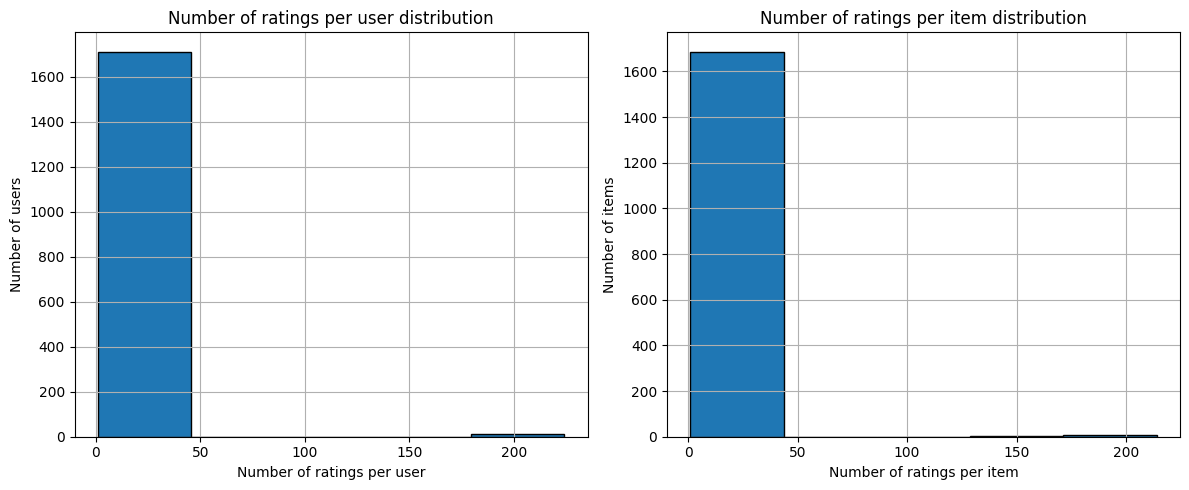

In [360]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
data['Unique ID'].value_counts().hist(bins = 5, edgecolor = 'black')
plt.xlabel('Number of ratings per user')
plt.ylabel('Number of users')
plt.title('Number of ratings per user distribution')

plt.subplot(1,2,2)
data['Product Id'].value_counts().hist(bins = 5, edgecolor = 'black')
plt.xlabel('Number of ratings per item')
plt.ylabel('Number of items')
plt.title('Number of ratings per item distribution')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Number of ratings')

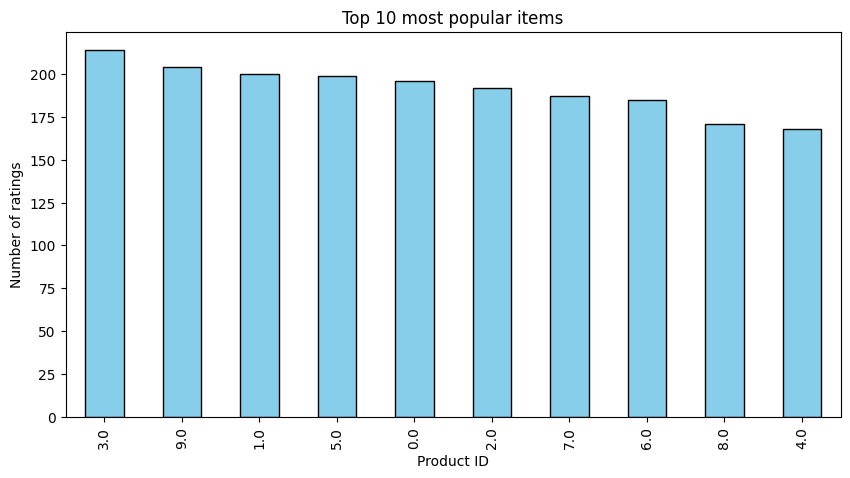

In [361]:
#Most Popular Items
popular_items = data['Product Id'].value_counts().head(10)
popular_items.plot(kind = 'bar', figsize = (10,5), color = 'skyblue', edgecolor = 'black')
plt.title('Top 10 most popular items')
plt.xlabel('Product ID')
plt.ylabel('Number of ratings')

Text(0, 0.5, 'Number of ratings')

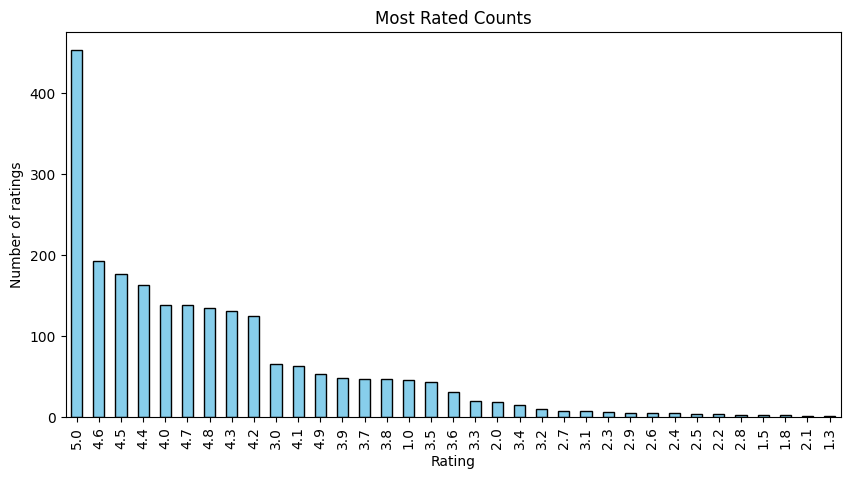

In [362]:
#Most Rated Counts
data['Product Rating'].value_counts().plot(kind = 'bar', figsize = (10,5), color = 'skyblue', edgecolor = 'black')
plt.title('Most Rated Counts')
plt.xlabel('Rating')
plt.ylabel('Number of ratings')

# Rating Based Recommendation System Using NLP

In [363]:
data[['Product Category', 'Product Description', 'Product Brand']] = data[['Product Category', 'Product Description', 'Product Brand']].astype(str)

Clean up Product Category, Product Description and Product tags using Spacy

In [364]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en_core_web_sm')

def clean_text(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

column_to_extract_from = ['Product Category', 'Product Brand', 'Product Description', 'Product Tags']

for column in column_to_extract_from:
    data[column] = data[column].apply(clean_text)

In [365]:
data.head(5)

,Unique ID,Product Id,Product Category,Product Brand,Product Name,Product Price,Product Description,Product Image Url,Product Tags,Product Rating,Product Reviews Count
0,1.705737e+09,2.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",8.95,nan,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"opi, infinite, shine, nail, lacquer, nail, pol...",NaN,NaN
1,9.500000e+01,76.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",29.86,"pack, 3, pack, 3, upc, 381519000201, beautiful...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"nice, n, easy, permanent, color, 111, natural,...",NaN,NaN
2,8.000000e+00,8.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,7.99,"clairol, nice, n, easy, permanent, color, give...",https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, natu...",4.5,29221.0
3,4.000000e+00,3.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",5.16,"calling, matte, lip, lovers, indulge, rich, cr...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"kokie, professional, matte, lipstick, hot, ber...",NaN,NaN
4,9.900000e+02,3.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",19.97,"1971, gillette, introduced, trac, ii, razor, s...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"gillette, trac, ii, plus, razor, blade, refill...",NaN,131.0


Focusing on rows with product ratings

In [366]:
average_ratings = data.copy()
average_ratings = average_ratings.groupby(['Product Name', 'Product Reviews Count', 'Product Brand'])['Product Rating'].mean().reset_index()
average_ratings.dropna(inplace = True)
average_ratings

,Product Name,Product Reviews Count,Product Brand,Product Rating
0,$6 Mail-In Rebate Available Braun Epilator Sil...,146.0,braun,4.5
1,($100 Value) Peter Thomas Roth Thermal Therapy...,1.0,"peter, thomas, roth",5.0
3,($125 Value) Impressions Vanity Touch Pro LED ...,2.0,"impressions, vanity",2.5
4,($129 Value) CHI G2 Ceramic Titanium Infused H...,23.0,chi,4.4
6,($14 Value) Burts Bees Beeswax Bounty Classic ...,10.0,"burt, bees",5.0
...,...,...,...,...
3314,"wet n wild MegaLast Retractable Eyeliner, Black",3.0,"wet, n, wild",4.3
3315,"wet n wild MegaLast Salon Nail Color, Club Havana",1525.0,"wet, n, wild",4.2
3317,"wet n wild Photo Focus Correcting Palette, Col...",12.0,"wet, n, wild",3.3
3319,"wet n wild Photo Focus Pressed Powder, Dark Café",635.0,"wet, n, wild",4.2


In [367]:
top_rated_items = average_ratings.sort_values(['Product Rating', 'Product Reviews Count'], ascending = False)
rating_based_recommendation = top_rated_items.head(10)
rating_based_recommendation['Product Rating'] = top_rated_items['Product Rating'].astype(int)
rating_based_recommendation['Product Reviews Count'] = top_rated_items['Product Reviews Count'].astype(int)

/var/folders/5r/1lsvb2gx50n91j4gfq7gvff80000gn/T/ipykernel_16750/2395874671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based_recommendation['Product Rating'] = top_rated_items['Product Rating'].astype(int)
/var/folders/5r/1lsvb2gx50n91j4gfq7gvff80000gn/T/ipykernel_16750/2395874671.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based_recommendation['Product Reviews Count'] = top_rated_items['Product Reviews Count'].astype(int)


In [368]:
print("Rating Based Recommendation System: Highly Rated Products")
rating_based_recommendation

Rating Based Recommendation System: Highly Rated Products


,Product Name,Product Reviews Count,Product Brand,Product Rating
291,"ACT Braces Care Anticavity Mouthwash (18 Oz, C...",32,act,5
3150,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24,versace,5
3067,Tree Hut Shea Sugar Scrub Passion Fruit & Guav...,22,"tree, hut",5
566,Biolage Hydrasource Conditioning Balm For Dry ...,21,matrix,5
437,"Ardell Double Up False Eyelashes, 203",19,ardell,5
1450,"Hello Kids Fluoride Free and SLS Free Rinse, N...",19,hello,5
2524,"ReNew Life CleanseMore, Veggie Caps, 60 ea",15,"renew, life",5
67,"(2 Pack) Pro Styl Vitamin &quotE&quot Oil, 6 Oz",13,,5
477,Aura Cacia Essential Oil Frankincense 0.5 fl o...,13,"aura, cacia",5
817,Clay-Park Labs Ammonium Lactate Lotion 12% 14 ...,13,"clay, park, labs",5


# Content Based Recommendation System

Use TF IDF (Term Frequency Inverse Document Frequency) Vectorizer and fuzzy wuzzy for a better search bar experience

In [369]:
"""
I used the TF-IDF vectorizer to convert the text data into a matrix of TF-IDF features, 
afterwards I used cosine similarity to 
calculate the similarity between the products based on the product tags. 
The cosine similarity matrix is then used to recommend products
based on the similarity between the products.
"""
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_train = data.copy()
tfidf_matrix_content = tfidf_vectorizer.fit_transform(tfidf_train['Product Tags'])
cosine_similarity_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

So for example, I'm gonna select a Gillete razor to test if the system works which has a product ID of 3761

In [370]:
tfidf_train

,Unique ID,Product Id,Product Category,Product Brand,Product Name,Product Price,Product Description,Product Image Url,Product Tags,Product Rating,Product Reviews Count
0,1.705737e+09,2.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",8.95,nan,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"opi, infinite, shine, nail, lacquer, nail, pol...",NaN,NaN
1,9.500000e+01,76.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",29.86,"pack, 3, pack, 3, upc, 381519000201, beautiful...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"nice, n, easy, permanent, color, 111, natural,...",NaN,NaN
2,8.000000e+00,8.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,7.99,"clairol, nice, n, easy, permanent, color, give...",https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, natu...",4.5,29221.0
3,4.000000e+00,3.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",5.16,"calling, matte, lip, lovers, indulge, rich, cr...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"kokie, professional, matte, lipstick, hot, ber...",NaN,NaN
4,9.900000e+02,3.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",19.97,"1971, gillette, introduced, trac, ii, razor, s...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"gillette, trac, ii, plus, razor, blade, refill...",NaN,131.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,2.771000e+03,208.0,"household, essentials, air, fresheners, spray,...","eclectic, lady","Garden Mint Room Spray (Double Strength), 4 ou...",14.99,"garden, mint, lovely, blend, spearmint, lettuc...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"garden, mint, room, spray, double, strength, 4...",4.5,2.0
4996,0.000000e+00,1.0,"beauty, hair, care, hair, color, permanent, ha...",garnier,Garnier Nutrisse Nourishing Hair Color Creme (...,4.44,"garnier, nutrisse, nourishing, hair, color, cr...",https://i5.walmartimages.com/asr/24d7a837-51f8...,"garnier, nutrisse, nourishing, hair, color, cr...",3.9,7484.0
4997,3.400000e+01,96.0,"beauty, makeup, nails",stoneway,"Nail File Electric Drill, 6 in 1 Professional ...",15.78,"multifunctional, nail, drill, kit, come, 6, di...",https://i5.walmartimages.com/asr/d6202179-2c93...,"nail, file, electric, drill, 6, 1, professiona...",NaN,4.0
4998,9.000000e+00,7.0,"premium, beauty, premium, bath, body, premium,...",creed,Creed Love In Black Hair And Body Wash 6.8oz/2...,32.99,nan,https://i5.walmartimages.com/asr/3dc99239-66d2...,"creed, love, black, hair, body, wash, new, box...",NaN,NaN


In [371]:
tfidf_train[tfidf_train['Unique ID'] == 990]['Product Name'].values[0]

'Gillette TRAC II Plus Razor Blade Refills, Fit TRAC II Handles, 10 ct'

Create a list of similarities

In [372]:
item_name = 'Gillette TRAC II Plus Razor Blade Refills, Fit TRAC II Handles, 10 ct'
item_index = tfidf_train[tfidf_train['Product Name'] == item_name].index[0]
similar_items = list(enumerate(cosine_similarity_content[item_index]))

Select the top 5 similar products to recommend

In [373]:
similar_items = sorted(similar_items, key = lambda x: x[1], reverse = True)
top_similar_items = similar_items[1:6]

recommended_item_indices = [x[0] for x in top_similar_items]

In [374]:
tfidf_train.iloc[recommended_item_indices][['Product Name', 'Product Brand', 'Product Description', 'Product Price']]

,Product Name,Product Brand,Product Description,Product Price
752,Gillette Trac II Plus Refill Razor Blade Cartr...,gillette,"gillette, g, ii, plus, blades, gillette, conto...",12.99
4824,Gillette Venus Extra Smooth Swirl Womens Razor...,venus,"choose, smooth, countoured, moves, gillette, v...",19.74
3188,Gillette Venus Extra Smooth Sensitive Womens R...,venus,"gillette, venus, extra, smooth, sensitive, raz...",12.97
1711,Gillette Venus Womens Refill Razor Blade Cartr...,gillette,"blades, surrounded, soft, protective, cushions...",11.91
191,Schick Injector Blades Mens Razor Blade Refill...,schick,"schick, injector, mens, refill, razor, blades,...",6.83


Compile everything into 1 function

In [401]:
def content_based_recommendation(data, item_name, top_n = 10):
    if item_name not in data['Product Name'].values:
        print(f"Item: {item_name} not found in the dataset")
        return pd.DataFrame()
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    data['Product Tags'] = data['Product Tags'].fillna('')
    tfidf_train = data.copy()
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(tfidf_train['Product Tags'])
    cosine_similarity_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)
    item_index = tfidf_train[tfidf_train['Product Name'] == item_name].index[0]
    similar_items = list(enumerate(cosine_similarity_content[item_index]))
    similar_items = sorted(similar_items, key = lambda x: x[1], reverse = True)
    top_similar_items = similar_items[1:10]

    recommended_item_indices = [x[0] for x in top_similar_items]
    recommended_item_details = tfidf_train.iloc[recommended_item_indices][['Product Name','Product Description', 
                                                                           'Product Brand', 'Product Price']]
    return recommended_item_details

# Collaborative Filtering (User Item Similarity)

In [402]:
print(data.groupby(['Unique ID', 'Product Id']).size())


Unique ID     Product Id
0.000000e+00  0.0            5
              1.0           13
              2.0            7
              3.0            8
              4.0            8
                            ..
9.967409e+13  1926.0         1
6.094514e+14  561.0          1
3.007694e+17  172974.0       1
3.081297e+19  8.0            1
8.148290e+23  44.0           1
Length: 4090, dtype: int64


In [403]:
CF_data = data.copy()
CF_data['Product Rating'] = CF_data['Product Rating'].fillna(CF_data['Product Rating'].mean())

user_item_matrix = CF_data.pivot_table(
    index='Unique ID', 
    columns='Product Id', 
    values='Product Rating', 
    aggfunc='mean', 
    fill_value=0
)

user_item_matrix

Product Id,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,...,1.007940e+42,1.007940e+42,1.008730e+42,1.030521e+42,1.030521e+42,1.030521e+42,1.076430e+42,3.002240e+42,5.002240e+42,5.005509e+42
Unique ID,,,,,,,,,,,,,,,,,,,,,
0.000000e+00,4.557849,4.350123,4.511212,4.271639,4.459139,4.294622,4.259811,4.122311,4.435697,4.351372,...,0.0,0.000000,0.0,0.0,0.000000,4.294622,5.000000,0.0,0.0,0.0
1.000000e+00,4.296773,4.294622,4.508123,4.075268,4.278851,4.480644,4.398655,4.497311,4.294622,4.330943,...,0.0,4.700000,0.0,0.0,5.000000,0.000000,0.000000,0.0,0.0,0.0
2.000000e+00,4.353301,4.456773,4.136155,4.233430,4.225317,4.406235,4.345518,4.380644,4.069305,4.476773,...,0.0,4.531541,0.0,0.0,4.294622,0.000000,4.294622,0.0,0.0,4.6
3.000000e+00,4.316773,4.345966,4.446414,4.464426,3.853301,4.541320,4.296414,4.294622,4.294622,4.398924,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
4.000000e+00,4.598655,3.656235,4.072983,4.536773,4.234139,4.396927,4.049295,4.554838,4.252568,4.678924,...,0.0,4.196414,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.967409e+13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
6.094514e+14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3.007694e+17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [404]:
user_similarity = cosine_similarity(user_item_matrix)

In [405]:
target_user_id = 4
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [406]:
user_similarities = user_similarity[target_user_index]
similar_user_indices = user_similarities.argsort()[::-1][1::]

In [407]:
recommended_items = []
for user_index in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)
    recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])
rec_items_details = CF_data[CF_data['Product Id'].isin(recommended_items)][['Product Name', 'Product Brand', 'Product Description', 'Product Price', 'Product Image Url']]
rec_items_details

,Product Name,Product Brand,Product Description,Product Price,Product Image Url
31,Head & Shoulders Dandruff Conditioner Dry Scal...,"head, shoulders","pack, 3, pack, 3, upc, 037000143086, healthy, ...",24.47,https://i5.walmartimages.com/asr/a924d53f-007d...
37,Wahl Color Pro Plus Haircut Kit 79752T,wahl,"wahl, color, pro, plus, clipper, kit, features...",46.44,https://i5.walmartimages.com/asr/244aef35-aea3...
40,"Pantene Pro-V Repairing Mask Treatment, Gold S...",pantene,"experience, gold, standard, moisture, gold, se...",8.99,https://i5.walmartimages.com/asr/fbd2ba15-5051...
56,Grisi Soap - Avena Oat 3.5 Oz,grisi,"avena, grisi, bath, soap, ideal, oily, skin, o...",20.49,https://i5.walmartimages.com/asr/aecd4fd9-bfec...
58,"Humco Holding Group Glycerin, 16 Fl. Oz.",humco,"humco, glycerin, skin, protectant, 16, oz, hel...",31.55,https://i5.walmartimages.com/asr/52f2515b-09ca...
...,...,...,...,...,...
4913,Perfectionist Youth-Infusing Makeup SPF 25 - #...,"estee, lauder",nan,51.62,https://i5.walmartimages.com/asr/a2e520e0-8a44...
4965,Essential Oils Case 15ml Oils Storage for 60 B...,,"package, include, 1, x, essential, oil, storag...",25.45,https://i5.walmartimages.com/asr/4326e49a-fbbe...
4969,Dermalogica Skin Care Age Smart Dynamic Skin R...,dermalogica,nan,48.90,https://i5.walmartimages.com/asr/565dc6cc-72df...
4971,"COVERGIRL Exhibitionist Cream Lipstick, 235 Ch...",covergirl,"classic, colorlicious, lipstick, bigger, bette...",7.70,https://i5.walmartimages.com/asr/9239d5e4-bcda...


# Putting it all into 1 function

In [408]:
def collaborative_filtering_recommendations(data, target_user_id, top_n = 5):
    user_item_matrix = data.pivot_table(
        index='Unique ID', 
        columns='Product Id', 
        values='Product Rating', 
        aggfunc='mean', 
        fill_value=0
    )
    if target_user_id not in user_item_matrix.index:
        print(f"Target user {target_user_id} not found in data.")
        return pd.DataFrame()
    user_similarity = cosine_similarity(user_item_matrix)
    target_user_index = user_item_matrix.index.get_loc(target_user_id)
    user_similarities = user_similarity[target_user_index]
    similar_user_indices = user_similarities.argsort()[::-1][1::]
    recommended_items = []
    for user_index in similar_user_indices:
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])
    rec_items_details = data[data['Product Id'].isin(recommended_items)][['Product Name', 'Product Brand', 'Product Description', 'Product Price', 'Product Image Url']]
    return rec_items_details


In [409]:
#Example use case
collaborative_filtering_rec = collaborative_filtering_recommendations(CF_data, 5, 5)
print(f"Top 5 Collaborative Filtering Recommendations for User 5")
collaborative_filtering_rec

Top 5 Collaborative Filtering Recommendations for User 5


,Product Name,Product Brand,Product Description,Product Price,Product Image Url
42,Medline Aloetouch PROTECT Dimethicone Skin Pro...,medline,"aloetouch, protect, super, soft, single, patie...",3.07,https://i5.walmartimages.com/asr/ac8c39d4-4241...
56,Grisi Soap - Avena Oat 3.5 Oz,grisi,"avena, grisi, bath, soap, ideal, oily, skin, o...",20.49,https://i5.walmartimages.com/asr/aecd4fd9-bfec...
58,"Humco Holding Group Glycerin, 16 Fl. Oz.",humco,"humco, glycerin, skin, protectant, 16, oz, hel...",31.55,https://i5.walmartimages.com/asr/52f2515b-09ca...
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",covergirl,"classic, colorlicious, lipstick, bigger, bette...",9.85,https://i5.walmartimages.com/asr/95076ec0-ffbd...
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",bioastin,"nutrex, hawaii, bioastin, hawaiian, astaxanthi...",47.30,https://i5.walmartimages.com/asr/6da9e238-b19e...
...,...,...,...,...,...
4913,Perfectionist Youth-Infusing Makeup SPF 25 - #...,"estee, lauder",nan,51.62,https://i5.walmartimages.com/asr/a2e520e0-8a44...
4918,Aveeno Protect + Hydrate Moisturizing Sunscree...,aveeno,"aveeno, protect, hydrate, sunscreen, lotion, b...",45.99,https://i5.walmartimages.com/asr/2a9894da-8ff3...
4958,2-Piece Twin Size Bedding Comforter Set All-se...,"unique, bargains",nan,41.78,https://i5.walmartimages.com/asr/42f1413f-acc3...
4965,Essential Oils Case 15ml Oils Storage for 60 B...,,"package, include, 1, x, essential, oil, storag...",25.45,https://i5.walmartimages.com/asr/4326e49a-fbbe...


In [410]:
def hybrid_rec_system (data, target_user_id, item_name,top_n = 10):
    content_based_rec = content_based_recommendation(data, item_name, top_n)
    collaborative_filtering_rec = collaborative_filtering_recommendations(data, target_user_id, top_n)
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()
    
    return hybrid_rec.head(10)


In [412]:
#Example use case
some_item_name = 'Gillette TRAC II Plus Razor Blade Refills, Fit TRAC II Handles, 10 ct'
target_user_id_num = 10
hybrid_rec = hybrid_rec_system(data, target_user_id= target_user_id_num, item_name= some_item_name, top_n= 5)
print(f"Top 5 Hybrid Recommendations for User {target_user_id} based on item: {item_name} :")
hybrid_rec


Top 5 Hybrid Recommendations for User 4 based on item: Gillette TRAC II Plus Razor Blade Refills, Fit TRAC II Handles, 10 ct :


,Product Name,Product Description,Product Brand,Product Price,Product Image Url
752,Gillette Trac II Plus Refill Razor Blade Cartr...,"gillette, g, ii, plus, blades, gillette, conto...",gillette,12.99,NaN
4824,Gillette Venus Extra Smooth Swirl Womens Razor...,"choose, smooth, countoured, moves, gillette, v...",venus,19.74,NaN
3188,Gillette Venus Extra Smooth Sensitive Womens R...,"gillette, venus, extra, smooth, sensitive, raz...",venus,12.97,NaN
1711,Gillette Venus Womens Refill Razor Blade Cartr...,"blades, surrounded, soft, protective, cushions...",gillette,11.91,NaN
191,Schick Injector Blades Mens Razor Blade Refill...,"schick, injector, mens, refill, razor, blades,...",schick,6.83,NaN
2084,Harrys Mens Razor: Bright Orange Handle and 2 ...,"harrys, razors, men, features, need, close, co...",harry,9.97,NaN
4051,"Amouage Library Opus II, 3.4 Oz",nan,amouage,169.77,NaN
4911,Gillette SkinGuard Sensitive Razor for Men Ref...,"gillette, skinguard, sensitive, razor, men, re...",gillette,34.99,NaN
673,Schick Intuition Sweet Water Lily Womens Razor...,"schick, intuition, sweet, water, lily, refills...",schick,19.17,NaN
0,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",nan,opi,8.95,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...
